# Regresión y clasificación con árboles y random forests

## Autor:   Ronie Martínez

#### Trabajo presentado como actividad propuesta para la asignatura "Aprendizaje Automático"

## Objetivo
Aplicar al conjunto de datos proporcionado los métodos o algoritmos de Random Forest y Árboles de regresión/clasificación para predecir (regresión) el número de ventas de bicicletas por hora así como para clasificar las horas de venta alta como las de venta baja.

## Información sobre los datos
El enlace: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset contiene los datos, la variable respuesta es “cnt”.

#### Pasos a seguir (orientativo)
- Análisis descriptivo de los datos
- Determinar el conjunto de modelización y el de validación
- Tratamiento de missing (si los hay)
- Tratamiento de variables categóricas
- Calcular las métricas de evaluación de ajuste adecuadas
- Comparar mediante las medidas que parezcan adecuadas la capacidad predictiva de ambos métodos
- Comentar los resultados obtenidos
- Otros comentarios que parezcan adecuados
- Variables respuesta:
 - Regresión: cnt
 - Clasificación:
   - Bajas ventas si cnt <=20
   - Altas ventas si cnt > 20

## Inspección de los datos y pre-procesamiento

### Importamos las librerías necesarias

https://scikit-learn.org/stable/modules/tree.html

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

In [33]:
import numpy as np
import pandas as pd

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics

# Decision trees
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

# Random Forest
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

### Cargamos el dataset
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

#### Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
 - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [34]:
# Cargamos nuestro dataset con información por horas
nombre_csv_h = 'hour.csv'
raw_data_h = pd.read_csv(nombre_csv_h)
print("Tamaño del dataset: ",raw_data_h.shape)
display(raw_data_h.head())
display(raw_data_h.tail())

Tamaño del dataset:  (17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [35]:
# Cargamos nuestro dataset con información por días
nombre_csv_d = 'day.csv'
raw_data_d = pd.read_csv(nombre_csv_d)
print("Tamaño del dataset: ",raw_data_d.shape)
display(raw_data_d.head())
display(raw_data_d.tail())

Tamaño del dataset:  (731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


Dependiendo el uso o la necesitad presentada, podemos usar cualquiera de los dos dataset. En nuestro caso, y debido a que no se especifica en la práctica, escogemos el dataset más extenso (información por horas) ya que los modelos basados en árboles de decisión y random forest funcionan mejor con una gran cantidad de datos.

### Tratamiento de missing y variables categóricas

In [36]:
# Verificamos que no haya valores missing
print("Hour: ")
print(raw_data_h.isna().sum()) # cantidad de datos no válidos

Hour: 
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


No existen valores missing.

Se podría realizar un proceso de _one-hot encoding_ para las variables categóricas, pero por la naturaleza de estas (y en base a pruebas realizadas, no existe mayor diferencia).

In [37]:
# eliminamos las columnas: 
# instant: es un índice que no aporta en nada al entrenamiento del modelo
raw_data_h.pop('instant');
# dteday: variable de tipo fecha que no es útil y es dificil de interpretar
raw_data_h.pop('dteday');
# casual y registered: la unión de ambas nos da el resultado buscado, que,
#  se supone, en la predicción de nuevos datos reales no tendríamos
raw_data_h.pop('casual');
raw_data_h.pop('registered');

### Determinar el conjunto de modelización y el de validación

Para el proceso de "_hold-out_" se recomienda una relación de 80% - 20% entre el _training set_ y el _test set_. Adicionalmente es recomendable realizarlo de manera aleatoria debido a que se desconoce la naturaleza de la obtención de los datos.

In [38]:
dataset = raw_data_h.copy()
# Split data
train_ds = dataset.sample(frac=0.8, random_state=0)
print("Training dataset shape: ",train_ds.shape)
test_ds = dataset.drop(train_ds.index)
print("Test dataset shape: ",test_ds.shape)

Training dataset shape:  (13903, 13)
Test dataset shape:  (3476, 13)


### Inspección de los datos

Como herramienta para visualización, podemos graficar la distribución conjunta y relación entre algunos atributos del _dataset_

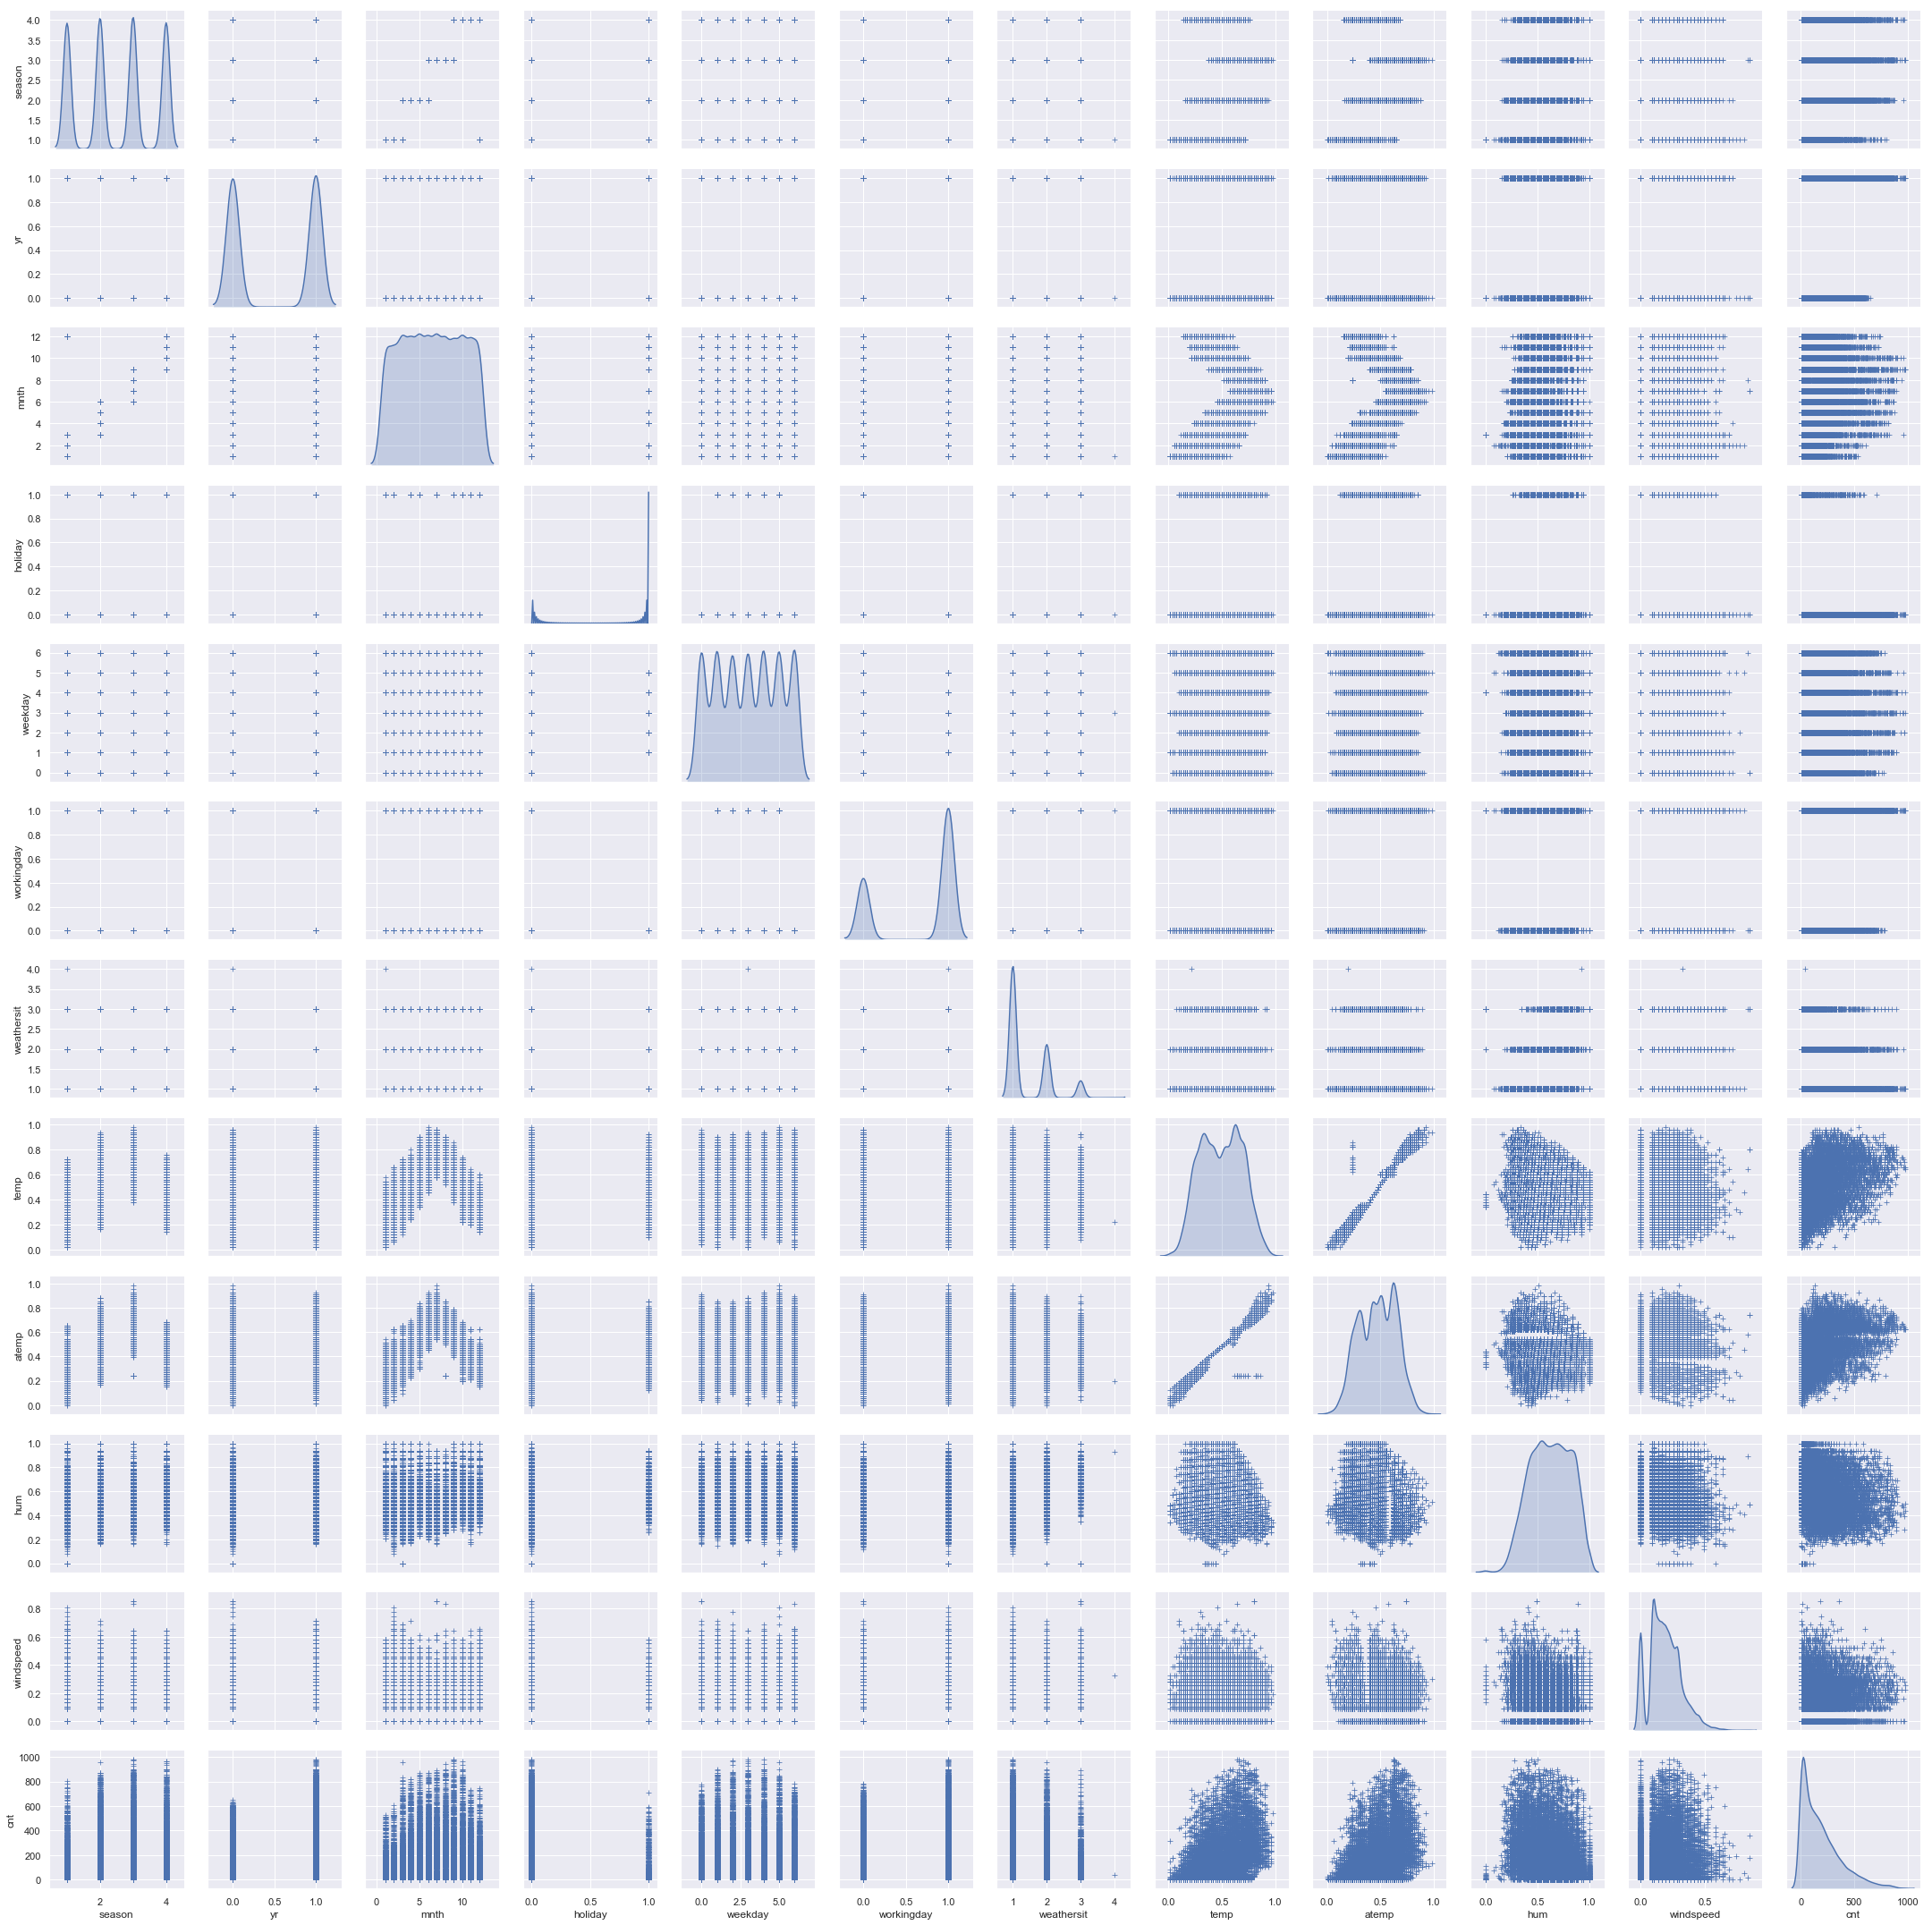

In [39]:
# Inspect the data
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
import seaborn as sns
sns.pairplot(train_ds[['season',
                       'yr',
                       'mnth',
                       'holiday',
                       'weekday',
                       'workingday',
                       'weathersit',
                       'temp',
                       'atemp',
                       'hum',
                       'windspeed',
                       'cnt']], diag_kind='kde', markers="+", diag_kws=dict(shade=True));

In [40]:
train_stats = train_ds.describe()
train_stats.pop("cnt")
train_stats = train_stats.transpose()
display(train_stats)

,count,mean,std,min,25%,50%,75%,max
season,13903.0,2.502410,1.107308,1.00,2.0000,3.0000,3.0000,4.0000
yr,13903.0,0.506078,0.499981,0.00,0.0000,1.0000,1.0000,1.0000
mnth,13903.0,6.537150,3.440542,1.00,4.0000,7.0000,10.0000,12.0000
hr,13903.0,11.567360,6.909993,0.00,6.0000,12.0000,18.0000,23.0000
holiday,13903.0,0.028699,0.166965,0.00,0.0000,0.0000,0.0000,1.0000
weekday,13903.0,3.013378,2.007852,0.00,1.0000,3.0000,5.0000,6.0000
workingday,13903.0,0.682299,0.465599,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,13903.0,1.430555,0.642828,1.00,1.0000,1.0000,2.0000,4.0000
temp,13903.0,0.496736,0.192070,0.02,0.3400,0.5000,0.6600,0.9800
atemp,13903.0,0.475594,0.171369,0.00,0.3333,0.4848,0.6212,0.9848


### Separamos la columna objetivo (_label_)
Separamos los valores de la columna 'cnt' que es el resultado en nuestro _dataset_

In [41]:
# Separación de la columna "resultado"
train_ls = train_ds.pop('cnt')
test_ls = test_ds.pop('cnt')

### Normalizamos los atributos (_features_)
La normalización de los datos es un paso muy importante previo al entrenamiento de nuestro modelo (tanto para SVM como para NN), ya que los atributos pueden tener rangos y valores muy variados y distintos.

In [42]:
# Creamos una función para realizar la normalización
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

train_ds_norm = norm(train_ds)
test_ds_norm = norm(test_ds)

### Decision Trees
Los árboles de decisión son modelos con pocos parámetros para sintonizar, en este caso, el párametro importante es la profundidad del árbol. Creamos una función general para poder explorar modelos con diferentes profundidades y comparar sus desempeños.

#### Decision Tree Regressor

In [43]:
def evaluacion_DTR(X_train, y_train, X_test, y_test, depth):
    dt_reg = DecisionTreeRegressor(max_depth=depth)
    y_pred = dt_reg.fit(X_train, y_train).predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    return mse, mae

In [44]:
depths = [8, 9, 10, 11, 12, 13, 14, 15, 16]
mse = np.zeros((len(depths)))
mae = np.zeros((len(depths)))

i = 0

for d in depths:
    #mse[i, j] = e+d
    mse[i], mae[i] = evaluacion_DTR(train_ds_norm, train_ls, test_ds_norm, test_ls, d)
    i = i+1

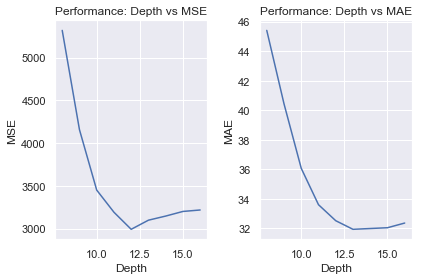

MSE:  [5319.49910615 4157.35601471 3450.29891693 3191.18800349 2991.38568873
 3098.15747776 3146.30183287 3200.45566405 3217.51979778]
MAE:  [45.40977922 40.43848589 36.06919262 33.60706987 32.52300852 31.94041963
 31.99419024 32.04693698 32.36455155]


In [45]:
f, (ax0, ax1) = plt.subplots(1,2)
ax0.plot(depths, mse)
ax0.set_xlabel("Depth")
ax0.set_ylabel("MSE")
ax0.set_title("Performance: Depth vs MSE")

ax1.plot(depths, mae)
ax1.set_xlabel("Depth")
ax1.set_ylabel("MAE")
ax1.set_title("Performance: Depth vs MAE")

plt.tight_layout()
plt.show()

print("MSE: ", mse)
print("MAE: ", mae)

Podemos comprobar que existe una mejora en el desempeño mientras más profundo es el árbol de decisión, llegando a una profundidad de 14 como punto máximo, es decir, más allá de este punto no existe mejora considerable.

Ahora, también podemos utilizar un modelo con este parámetro definido por defecto, en el cuál podemos observar un desempeño similar.

In [46]:
# Regressor Decision Tree
dt_r = DecisionTreeRegressor()#max_depth=None
print(dt_r)
pred_ls = dt_r.fit(train_ds_norm, train_ls).predict(test_ds_norm)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


In [47]:
print("Decision tree  MSE: ", metrics.mean_squared_error(test_ls, pred_ls), 
      "- MAE: ", metrics.mean_absolute_error(test_ls, pred_ls))

Decision tree  MSE:  3581.221231300345 - MAE:  33.857594936708864


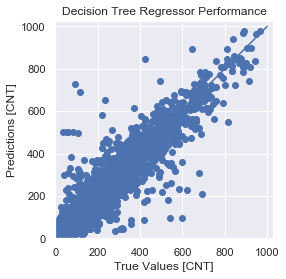

In [48]:
plt.scatter(test_ls, pred_ls)
plt.xlabel('True Values [CNT]')
plt.ylabel('Predictions [CNT]')
plt.title('Decision Tree Regressor Performance')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([0, 1000], [0, 1000])

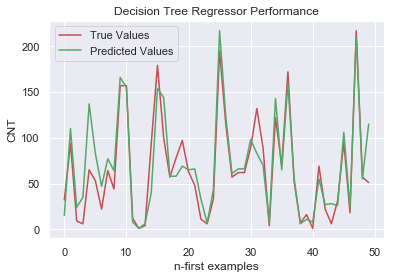

In [49]:
x = np.arange(50)
plt.plot(x, test_ls[0:50], 'r', x, pred_ls[0:50], 'g')
plt.legend(['True Values', 'Predicted Values'])
plt.title('Decision Tree Regressor Performance')
plt.xlabel('n-first examples')
plt.ylabel('CNT')
plt.show()

Se puede comprobar un desempeño bastante bueno (considerando que los árboles de decisión no suelen tener un desempeño excepcional en problemas de regresión).

#### Decision Tree Classifier

In [50]:
train_lsC = train_ls.copy()
train_lsC[train_lsC<=20]='bajas_ventas'
train_lsC[train_lsC!='bajas_ventas']='altas_ventas'

train_ds_normC = train_ds_norm.copy()

test_lsC = test_ls.copy()
test_lsC[test_lsC<=20]='bajas_ventas'
test_lsC[test_lsC!='bajas_ventas']='altas_ventas'

test_ds_normC = test_ds_norm.copy()

In [51]:
def evaluacion_DTC(X_train, y_train, X_test, y_test):#, depth):
    dt_clf = DecisionTreeClassifier()#max_depth=depth)
    y_pred = dt_clf.fit(X_train, y_train).predict(X_test)
    print(dt_clf)
    return metrics.confusion_matrix(y_test, y_pred), metrics.classification_report(y_test, y_pred)

Para evaluar el resultado escogimos la matriz de confusión y el reporte de clasificación que nos brinda la librería sklearn.


*   precision: nos brinda la precisión de nuestro algoritmo (altas y bajas ventas).
*   recall: nos describe la capacidad de recordar del algoritmo.
*   f1-score: nos ilustra que porcentaje de predicciones positivas fueron correctas.





In [52]:
matriz, metricas = evaluacion_DTC(train_ds_normC, train_lsC, test_ds_normC, test_lsC)
print("========================================================")
print("---Matriz de confusión---")
print(matriz)
print("========================================================")
print("---Métricas---")
print(metricas)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
---Matriz de confusión---
[[2783   79]
 [  85  529]]
---Métricas---
              precision    recall  f1-score   support

altas_ventas       0.97      0.97      0.97      2862
bajas_ventas       0.87      0.86      0.87       614

   micro avg       0.95      0.95      0.95      3476
   macro avg       0.92      0.92      0.92      3476
weighted avg       0.95      0.95      0.95      3476



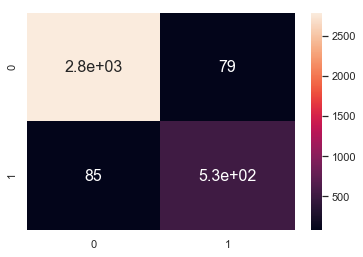

In [53]:
sns.set(font_scale=1)#for label size
sns.heatmap(matriz, annot=True,annot_kws={"size":  16});# font size

Al tratarse de un problema "sencillo" de clasificación binaria el algoritmo presenta un muy buen desempeño. Ahora, esto también puede deberse al desbalance que existe entre las dos clases (la clase de "altas_ventas" tiene muchos más ejemplos que la clase de "bajas_ventas").

##### - Gráfica del árbol de clasificación
Debido a que el árbol de clasificación generado anteriormente es muy amplio, se decidió crear uno nuevo con profundidad máxima de 3 (con fines de visualización). Para esto, se tuvo que instalar las librerías _graphviz_ y _pydotplus_ (https://www.datacamp.com/community/tutorials/decision-tree-classification-python), y modificar manualmente las variables de entorno (https://stackoverflow.com/questions/45729624/graphvizs-executables-not-found-anaconda-3).

**Si se desea ejecutar el código localmente, se debe seguir el proceso mencionado.**

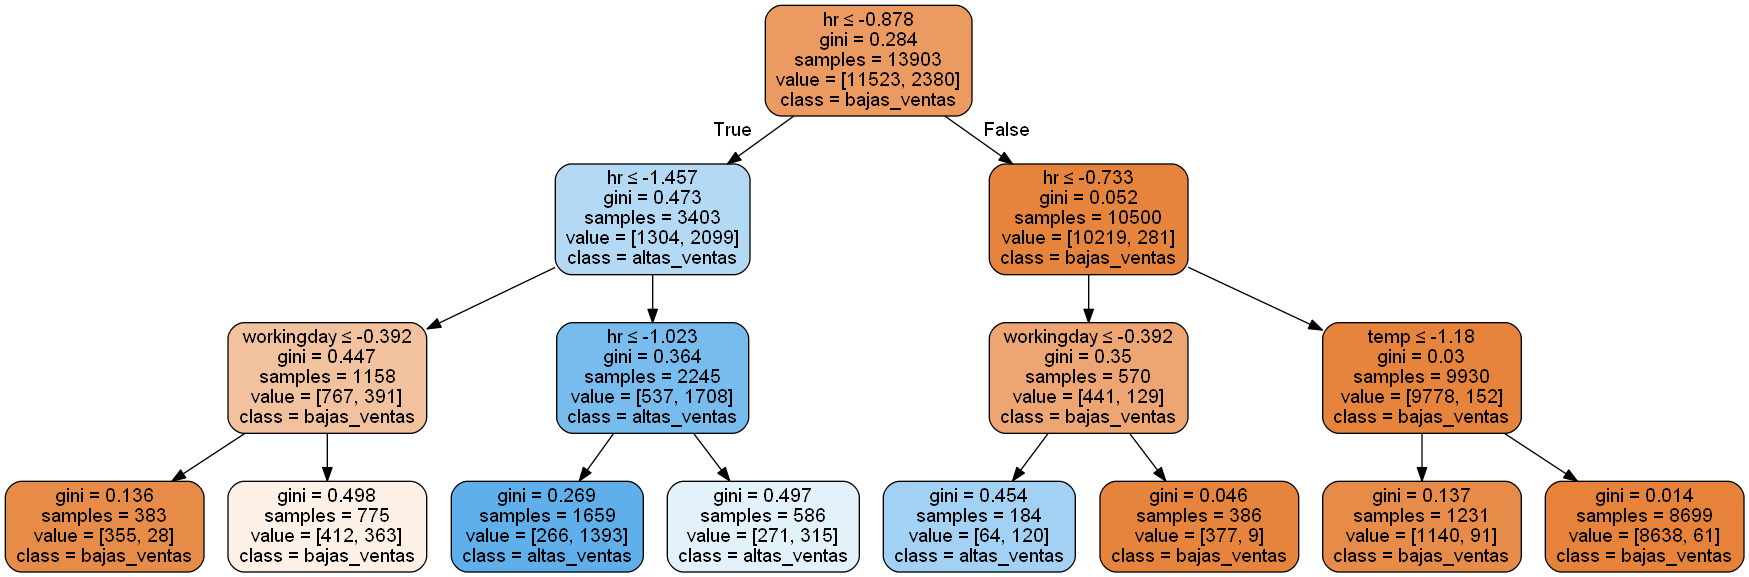

In [54]:
#pip install graphviz
#pip install pydotplus
clf = DecisionTreeClassifier(max_depth=3)
y_pred = clf.fit(train_ds_normC, train_lsC).predict(test_ds_normC)

feature_cols=['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 
              'weathersit', 'temp', 'atemp', 'hum', 'windspeed']

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['bajas_ventas','altas_ventas'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('dt_clf.png')
Image(graph.create_png())

### Random Forest
Debido a que los modelos de _Random Forest_ están basados en árboles de decisión, tienen el mismo parámetro para sintonizar (profundidad), y también el número de árboles (_estimators_) y el número de características máximas (_features_).

En el caso de esta última, se realizaron pruebas con un máximo de características igual a *3*, escogido acorde a lo revisado en la teoría expuesta en clase, sin embargo, se obtuvo un muy mal desempeño, aparentemente debido a que la cantidad de características no es muy extensa, por lo que se decidió dejar el parámetro de _max_features_ en automático.

#### Random Forest Regressor

In [55]:
def evaluacion_RFR(X_train, y_train, X_test, y_test, depth, estimators):
    rf_reg = RandomForestRegressor(max_depth=depth, random_state=0, n_estimators=estimators)#, max_features=3)
    y_pred = rf_reg.fit(X_train, y_train).predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    return mse, mae

In [56]:
depths = [8, 9, 10, 11, 12, 13, 14]
estimators = [25, 50, 100]
mse = np.zeros((len(estimators), len(depths)))
mae = np.zeros((len(estimators), len(depths)))
# columns estimators
# rows depths

i = 0
j = 0

for d in depths:
    i = 0
    for e in estimators:
        mse[i, j], mae[i, j] = evaluacion_RFR(train_ds_norm, train_ls, test_ds_norm, test_ls, d, e)
        i = i+1
    j = j+1

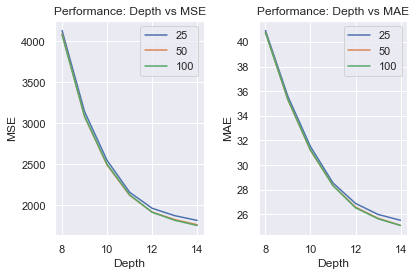

MSE:  [[4129.46970232 3139.08387963 2544.37582135 2156.75130014 1961.29324782
  1871.0840224  1813.19706674]
 [4088.14263631 3077.77038577 2487.22183486 2119.48456153 1914.71252242
  1823.56095345 1760.552071  ]
 [4076.68611382 3083.29224507 2497.04548305 2126.30939072 1912.33270344
  1815.03739742 1750.89462714]]
MAE:  [[40.92284491 35.55423885 31.49715249 28.54471849 26.88648544 25.99208673
  25.51512507]
 [40.76394986 35.27626562 31.18199966 28.33678342 26.58298838 25.67978558
  25.10558294]
 [40.74822442 35.31051544 31.22343613 28.33214251 26.53048485 25.63796479
  25.09210242]]


In [57]:
f, (ax0, ax1) = plt.subplots(1,2)
for k in range(mse.shape[0]):
    ax0.plot(depths, mse[k,:])
ax0.legend(estimators)
ax0.set_xlabel("Depth")
ax0.set_ylabel("MSE")
ax0.set_title("Performance: Depth vs MSE")

for k in range(mse.shape[0]):
    ax1.plot(depths, mae[k,:])
ax1.legend(estimators)
ax1.set_xlabel("Depth")
ax1.set_ylabel("MAE")
ax1.set_title("Performance: Depth vs MAE")

plt.tight_layout()
plt.show()

print("MSE: ", mse)
print("MAE: ", mae)

Al igual que con los árboles de decisión, el modelo se trunca cuando hay entre 250 y 500 árboles (se puede decir que ya no existe una mejora considerable) y con un una profundidad de 13.

Ahora, también podemos utilizar un modelo con estos parámetros definidos por defecto, en el cuál podemos observar un desempeño similar.

In [58]:
# Random Forest Regressor
rf_r = RandomForestRegressor(n_estimators=100) #max_depth=None, max_features='auto'
print(rf_r)
pred_ls = rf_r.fit(train_ds_norm, train_ls).predict(test_ds_norm)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [59]:
print("Random forest  MSE: ", metrics.mean_squared_error(test_ls, pred_ls), 
      "- MAE: ", metrics.mean_absolute_error(test_ls, pred_ls))

Random forest  MSE:  1687.8880354481903 - MAE:  24.55775447284783


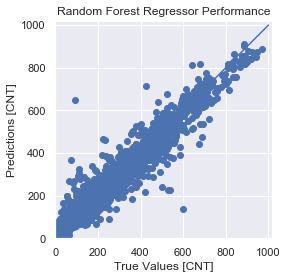

In [60]:
plt.scatter(test_ls, pred_ls)
plt.xlabel('True Values [CNT]')
plt.ylabel('Predictions [CNT]')
plt.title('Random Forest Regressor Performance')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([0, 1000], [0, 1000])

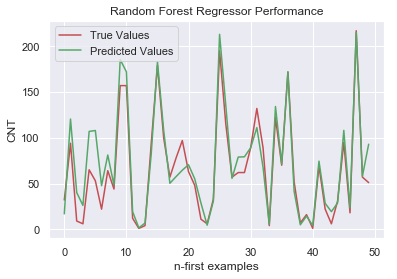

In [61]:
x = np.arange(50)
plt.plot(x, test_ls[0:50], 'r', x, pred_ls[0:50], 'g')
plt.legend(['True Values', 'Predicted Values'])
plt.title('Random Forest Regressor Performance')
plt.xlabel('n-first examples')
plt.ylabel('CNT')
plt.show()

El desempeño del modelo _random forest_ es bastante mejor en comparación con el _decision tree_, con resultados mucho más próximos a los reales y esperados: MAE = 33.72 para _decision tree regressor_ vs MAE = 24.48 para _random forest regressor_.

#### Random Forest Classifier

In [62]:
def evaluacion_RFC(X_train, y_train, X_test, y_test):#, depth):
    rf_clf = RandomForestClassifier(n_estimators=250) #max_depth=None, max_features='auto'
    y_pred = rf_clf.fit(X_train, y_train).predict(X_test)
    print(rf_clf)
    return metrics.confusion_matrix(y_test, y_pred), metrics.classification_report(y_test, y_pred)

In [63]:
matriz, metricas = evaluacion_RFC(train_ds_normC, train_lsC, test_ds_normC, test_lsC)
print("========================================================")
print("---Matriz de confusión---")
print(matriz)
print("========================================================")
print("---Métricas---")
print(metricas)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
---Matriz de confusión---
[[2811   51]
 [  71  543]]
---Métricas---
              precision    recall  f1-score   support

altas_ventas       0.98      0.98      0.98      2862
bajas_ventas       0.91      0.88      0.90       614

   micro avg       0.96      0.96      0.96      3476
   macro avg       0.94      0.93      0.94      3476
weighted avg       0.96      0.96      0.96      3476



El desempeño es bastante similar que el obtenido con el árbol de decisión desarrollado anteriormente, aunque, desde luego presenta un mejor desempeño. Se lo puede comprobar comparando las matrices de confusión de ambos modelos. 

Al igual que con el árbol de decisión, al tratarse de un problema "sencillo" de clasificación binaria el algoritmo presenta un muy buen desempeño que, como se mencionó, puede deberse al desbalance que existe entre las dos clases (la clase de "altas_ventas" tiene muchos más ejemplos que la clase de "bajas_ventas").

Los resultados del _F1-score_ son 0.97 (altas_ventas y 0.87 (bajas_ventas) para _decision tree classifier_ vs 0.98 (altas_ventas y 0.90 (bajas_ventas) para _random forest classifier_